# Examples on simulated data

## Prep

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

import sys,os
os.chdir('..') #change working directory

In [3]:
import numpy as np
from functools import wraps
import matplotlib.pyplot as plt

def viz_generated_data(func):
    """
    Visualizes data generated by a given function.
    
    Parameters:
        func (callable): Function that generates data (returns X, y).
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        X, y = func(*args, **kwargs)
        
        plt.figure(figsize=(6, 6))
        plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
        plt.xticks([])
        plt.yticks([])
        plt.legend()
        plt.title("Generated Data Visualization")
        plt.show()
        
        return X, y
    
    return wrapper

def generate_circular_data(n_samples=500, noise=0.1):
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out
    r_out = 1.0
    r_in = 0.5
    theta_out = 2 * np.pi * np.random.rand(n_samples_out)
    x_out = r_out * np.cos(theta_out) + noise * np.random.randn(n_samples_out)
    y_out = r_out * np.sin(theta_out) + noise * np.random.randn(n_samples_out)
    theta_in = 2 * np.pi * np.random.rand(n_samples_in)
    x_in = r_in * np.cos(theta_in) + noise * np.random.randn(n_samples_in)
    y_in = r_in * np.sin(theta_in) + noise * np.random.randn(n_samples_in)
    X = np.vstack((np.column_stack((x_out, y_out)), np.column_stack((x_in, y_in))))
    y = np.hstack((np.ones(n_samples_out), np.zeros(n_samples_in)))
    return X, y

def generate_spiral_data(n_samples=500, noise=0.1):
    n = np.sqrt(np.random.rand(n_samples // 2)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + noise * np.random.randn(n_samples // 2)
    d1y = np.sin(n) * n + noise * np.random.randn(n_samples // 2)
    X1 = np.column_stack((d1x, d1y))
    y1 = np.zeros(n_samples // 2)
    d2x = np.cos(n) * n + noise * np.random.randn(n_samples // 2)
    d2y = -np.sin(n) * n + noise * np.random.randn(n_samples // 2)
    X2 = np.column_stack((d2x, d2y))
    y2 = np.ones(n_samples // 2)
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    return X, y

def generate_checkerboard_data(n_samples=500, grid_size=4, noise=0.1):
    x = np.random.rand(n_samples) * grid_size
    y = np.random.rand(n_samples) * grid_size
    labels = ((np.floor(x) + np.floor(y)) % 2).astype(int)
    X = np.column_stack((x, y)) + noise * np.random.randn(n_samples, 2)
    return X, labels

def generate_linearly_separable_data(n_samples=500, noise=0.1):
    X = np.random.randn(n_samples, 2)
    y = (X[:, 1] > X[:, 0]).astype(int)
    X += noise * np.random.randn(n_samples, 2)
    return X, y

@viz_generated_data
def generate_data(choice=1, n_samples=500, noise=0.1, grid_size=4):
    """
    Generates data based on user input or random selection.
    Parameters:
        choice (str or int): One of ['circular', 'spiral', 'checkerboard', 'linear'] or an integer to select by %4.
        n_samples (int): Number of samples to generate.
        noise (float): Noise level to add to the data.
        grid_size (int): Grid size for checkerboard data.
    Returns:
        X (array): Features.
        y (array): Labels.
    """
    if isinstance(choice, int):
        choice = ['circular', 'spiral', 'checkerboard', 'linear'][choice % 4]
    
    if choice == 'circular':
        print('  -- loading circular data')
        return generate_circular_data(n_samples, noise)
    elif choice == 'spiral':
        print('  -- loading spiral data')
        return generate_spiral_data(n_samples, noise)
    elif choice == 'checkerboard':
        print('  -- loading checkerboard data')
        return generate_checkerboard_data(n_samples, grid_size, noise)
    else:
        print('  -- loading linear data')
        return generate_linearly_separable_data(n_samples, noise)


## Linearly seperable

  -- loading linear data


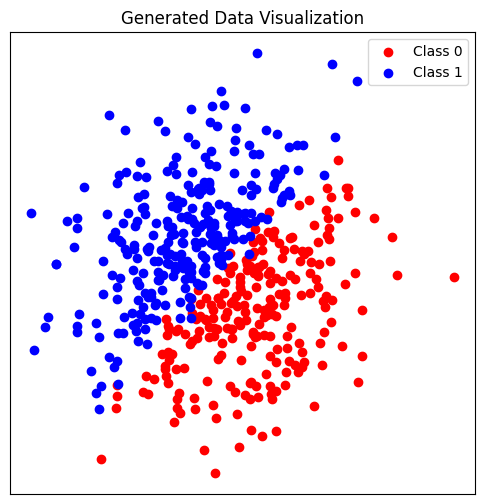

In [4]:
X, y = generate_data(choice='linear', n_samples=500, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### our lib

In [5]:
from tensor import Tensor
from dataset import TensorDataset
from module import Module
from linear import Linear
from activation import ReLU, Softmax
from loss import CrossEntropyLoss,MSE
from optimizer import SGD
from transforms import Standardize, ToTensor, Compose

# -- testing if it workd on ndarray
training_data=Tensor(X_train)
training_labels=Tensor(y_train)
test_data=Tensor(X_test)
test_labels=Tensor(y_test)

transformation=Compose([Standardize()])

train_dataset = TensorDataset(X_train, y_train, transform=transformation)
test_dataset = TensorDataset(X_test, y_test, transform=transformation)

print(f'train dataset of length {len(train_dataset)} and shape {train_dataset[0][0].shape}; labels shape {train_dataset[0][1].shape}')
print(f'test dataset of length {len(test_dataset)} and shape {test_dataset[0][0].shape}; labels shape {test_dataset[0][1].shape}')

print()

from dataloader import DataLoader
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=True)

for batch,(x,y) in enumerate(train_loader):
    print(f'batch {batch} data shape {x.shape}; labels shape {y.shape}')

>>> applying Standardize(inplace=True)...
>>> [Standardize(inplace=True)] applied successfully <<<
>>> applying Standardize(inplace=True)...
>>> [Standardize(inplace=True)] applied successfully <<<
train dataset of length 400 and shape (2,); labels shape ()
test dataset of length 100 and shape (2,); labels shape ()

batch 0 data shape (32, 2); labels shape (32,)
batch 1 data shape (32, 2); labels shape (32,)
batch 2 data shape (32, 2); labels shape (32,)
batch 3 data shape (32, 2); labels shape (32,)
batch 4 data shape (32, 2); labels shape (32,)
batch 5 data shape (32, 2); labels shape (32,)
batch 6 data shape (32, 2); labels shape (32,)
batch 7 data shape (32, 2); labels shape (32,)
batch 8 data shape (32, 2); labels shape (32,)
batch 9 data shape (32, 2); labels shape (32,)
batch 10 data shape (32, 2); labels shape (32,)
batch 11 data shape (32, 2); labels shape (32,)
batch 12 data shape (16, 2); labels shape (16,)


In [6]:
class SimpleNN(Module):
    def __init__(self):
        super().__init__()
        self.fc1=Linear(2, 5)
        self.relu=ReLU()
        self.fc2=Linear(5, 1)
        self.softmax=Softmax()

    def forward(self, x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        return self.softmax(x)
    
model = SimpleNN()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = MSE()

# -- training
for epoch in range(10):
    for batch_no,(x, y) in enumerate(train_loader):
        x.flatten_batch()
        optimizer.zero_grad()
        y_hat = model(x)
        loss = loss_fn(y, y_hat)
        loss.backward()
        optimizer.step()
        

    print(f'iteration: {epoch}')    
    print(f'Loss: {loss.data}') 
    predictions = np.argmax(y_hat.data, axis=0)
    accuracy = np.sum(predictions == y.data) / y.data.size
    print(predictions, y.data)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('------------------')

iteration: 0
Loss: 0.5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1]
Accuracy: 50.00%
------------------
iteration: 1
Loss: 0.1875
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
Accuracy: 18.75%
------------------
iteration: 2
Loss: 0.6875
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0]
Accuracy: 68.75%
------------------
iteration: 3
Loss: 0.5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0]
Accuracy: 50.00%
------------------
iteration: 4
Loss: 0.625
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0]
Accuracy: 62.50%
------------------
iteration: 5
Loss: 0.8125
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
Accuracy: 81.25%
------------------
iteration: 6
Loss: 0.375
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1]
Accuracy: 37.50%
------------------
iteration: 7
Loss: 0.4375
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1]
Accu

### pytorch

In [11]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)  # Input layer
        self.fc2 = nn.Linear(32, 64)  # Hidden layer 1
        self.fc3 = nn.Linear(64, 32)  # Hidden layer 2
        self.fc4 = nn.Linear(32, 1)  # Output layer
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    
model = SimpleNN()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = nn.BCEWithLogitsLoss()


# -- training

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(X_batch).squeeze()  # Squeeze to match the target shape
        loss = loss_fn(outputs, y_batch.float())  # Target must be float for BCEWithLogitsLoss
        loss.backward()
        optimizer.step()  # Update weights

        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")



# -- testing

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")



Epoch 1/10, Loss: 8.5927
Epoch 2/10, Loss: 3.8075
Epoch 3/10, Loss: 2.7106
Epoch 4/10, Loss: 2.0606
Epoch 5/10, Loss: 2.3231
Epoch 6/10, Loss: 1.6095
Epoch 7/10, Loss: 1.1506
Epoch 8/10, Loss: 1.2108
Epoch 9/10, Loss: 1.1034
Epoch 10/10, Loss: 1.0486
Test Accuracy: 38.00%
